# Can you predict the strength of concrete?

## 📖 Background

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives. 

The compressive strength of concrete is a function of components and age, so your team is testing different combinations of ingredients at different time intervals. 

The project leader asked you to find a simple way to estimate strength so that students can predict how a particular sample is expected to perform.

## 💾 The data
The team has already tested more than a thousand samples ([source](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)):

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.

## Objective
Provide your project a formula that estimates the compressive strength. Include:

1. The average strength of the concrete samples at 1, 7, 14, and 28 days of age.
2. The coefficients $\beta_{0}$, $\beta_{1}$ ... $\beta_{8}$, to use in the following formula:

$$ Concrete \ Strength = \beta_{0} \ + \ \beta_{1}*cement \ + \ \beta_{2}*slag \ + \ \beta_{3}*fly \ ash  \ + \ \beta_{4}*water \ + $$ 
$$ \beta_{5}*superplasticizer \ + \ \beta_{6}*coarse \ aggregate \ + \ \beta_{7}*fine \ aggregate \ + \ \beta_{8}*age $$


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

DF = pd.read_csv('concrete_data.csv')

# print(DF.head())
# shorten the names 

DF.columns = ['Cement', 'Slag', 'Fly_ash', 'Water', 'Superplaticizers', 'Coarse_aggregate', 'Fine_aggregate', 'Age', 'Strength']

DF.head()


,Cement,Slag,Fly_ash,Water,Superplaticizers,Coarse_aggregate,Fine_aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [55]:
DF.corr()

,Cement,Slag,Fly_ash,Water,Superplaticizers,Coarse_aggregate,Fine_aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplaticizers,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Observations :

Cement is the best predictor, shows strong correlation.

blast_furnace_slag, fly_ash are very weak predictors.

superplasticizer and fly_ash shows strong correlation.

superplasticizer and fly_ash shows average correlation with compressive strength.

Water shows a negative correlation with strength

water and superplasticizer shows strong negative correlation

In [56]:
# shorten the names 

DF.columns = ['Cement', 'Slag', 'Fly_ash', 'Water', 'Superplaticizers', 'Coarse_aggregate', 'Fine_aggregate', 'Age', 'Strength']

DF.head()

,Cement,Slag,Fly_ash,Water,Superplaticizers,Coarse_aggregate,Fine_aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [57]:
# Lets only keep a few of the predictors and drop others 
DF_2 = DF.drop(["Slag", "Fly_ash", "Coarse_aggregate", "Fine_aggregate"], axis = 1)

# Split the output var. y from the predictors 
X = DF_2.drop("Strength", axis =1)
y = DF_2["Strength"]



In [58]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = sm.add_constant(X)

concrete_model = sm.OLS(y,X).fit()
print(concrete_model.summary())


                                 OLS Regression Results                                
Dep. Variable:               Strength   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              2486.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):                        0.00
Time:                        12:48:51   Log-Likelihood:                         -4028.3
No. Observations:                1030   AIC:                                      8065.
Df Residuals:                    1026   BIC:                                      8084.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

$$ Concrete \ Strength = 0 + \ 0.0738 *cement \   + \ 0.0167*water \ + $$ 
$$ 1.18*superplasticizer \  + \ 0.0992*age $$

# Residual plot

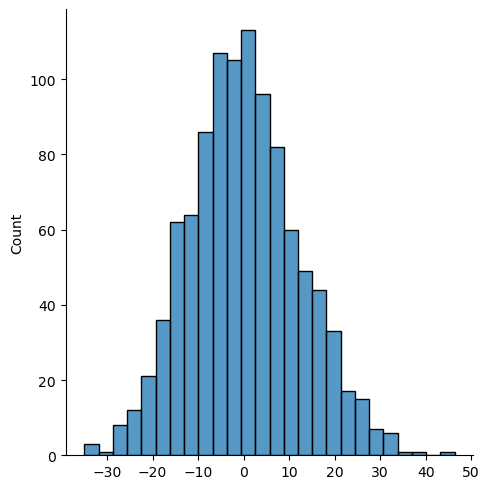

In [59]:
y_est = concrete_model.fittedvalues
res=y - y_est
sns.displot(res)


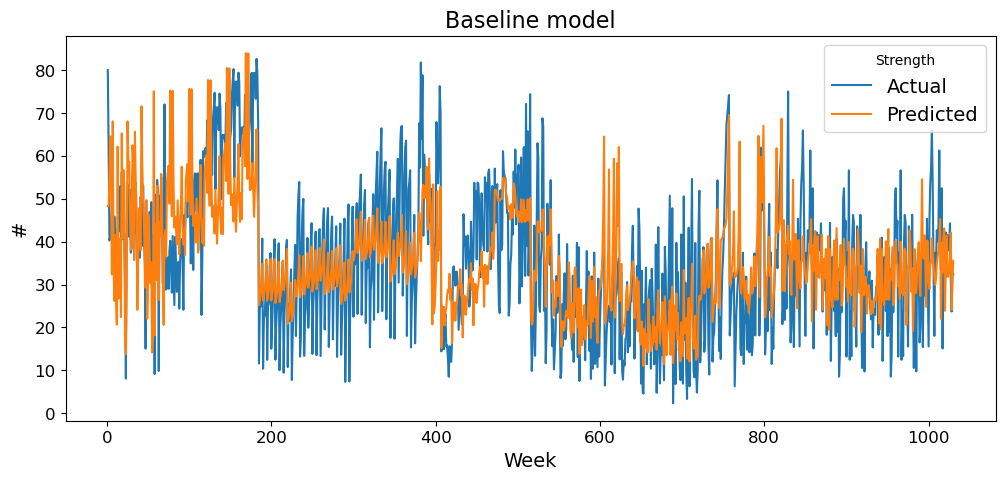

In [68]:

plt.figure(figsize = (12,5))
x = np.arange(1,len(y)+1 ,1 )
# 
# sns.scatterplot(x = x, y=y)

sns.lineplot(x = x, y=y, label = "Actual")   #real and estimated KPI over time 
sns.lineplot(x = x, y=y_est, label = "Predicted") 

plt.legend(title='Strength', fontsize=14)
plt.xlabel('Week', fontsize=14);
plt.ylabel('#', fontsize=14);
plt.title('Baseline model', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

In [21]:
vif = pd.DataFrame()
vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Cement,7.92
1,Water,7.73
2,Superplaticizers,2.01
3,Age,1.63
